# Walmart Sales Prediction (Dataset from Kaggle Competetion)
# @author Tapas Vashi
# MAC Student - Wilfrid Laurier University, Waterloo
# Cp-610-A Data Analysis 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step 1: Import all the datasets (csv files)

In [ ]:
df_features = pd.read_csv('T:/WLU Fall 2021/CP 610 Data Analysis/Walmart Sales Prediction/walmart-recruiting-store-sales-forecasting/features.csv/features.csv', parse_dates=['Date'])

In [ ]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_sales = pd.read_csv('T:/WLU Fall 2021/CP 610 Data Analysis/Walmart Sales Prediction/walmart-recruiting-store-sales-forecasting/train.csv/train.csv', parse_dates=['Date'])

In [ ]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
df_stores = pd.read_csv('T:/WLU Fall 2021/CP 610 Data Analysis/Walmart Sales Prediction/walmart-recruiting-store-sales-forecasting/stores.csv')

In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_sales_answer = pd.read_csv('T:/WLU Fall 2021/CP 610 Data Analysis/Walmart Sales Prediction/walmart-recruiting-store-sales-forecasting/test.csv/test.csv', parse_dates=['Date'])

In [ ]:
df_sales_answer.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
sample_submission = pd.read_csv('T:/WLU Fall 2021/CP 610 Data Analysis/Walmart Sales Prediction/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv/sampleSubmission.csv')

In [ ]:
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


# Step 2: Edit the data by combining all csv into one and converting all columns into numericals

In [ ]:
sales_answer = pd.merge(df_sales ,df_sales_answer, how='outer', on=['Store', 'Dept', 'Date', 'IsHoliday'])

## Here I have combine multiple csv files into one. 

In [ ]:
sales_feat = pd.merge(sales_answer ,df_features, how='outer', on=['Store', 'Date', 'IsHoliday'])

In [ ]:
df_all = pd.merge(sales_feat, df_stores, how='outer', on='Store')

In [ ]:
def multipledummies(df, non_numerical_columns):
    ''' Input the whole dataframe & name of non-numerical columns, output is clean dataframe that all is in numerical format'''

    for i in non_numerical_columns:

        # convert to numerical using get_dummies
        one_hot = pd.get_dummies(df[i], prefix=i)

        # append new numerical column to main df
        df = df.join(one_hot)

        # drop that non-numerical column
        df.drop(i, axis = 1, inplace=True)

    return df

In [ ]:
df_all['Day'] = df_all.Date.dt.day
df_all['Week'] = df_all.Date.dt.week 
df_all['Year'] = df_all.Date.dt.year

In [ ]:
df_all = multipledummies(df_all, ['Type'])
df_all.sample(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Size,Day,Week,Year,Type_A,Type_B,Type_C
112647,10,54,2010-05-28,527.00,False,76.67,3.058,NaN,NaN,NaN,...,NaN,126.160226,9.524,126512,28,21,2010,0,1,0
388171,32,49,2010-07-02,3241.71,False,74.74,2.728,NaN,NaN,NaN,...,NaN,189.488260,9.017,203007,2,26,2010,1,0,0
220739,18,74,2012-04-06,20487.83,False,43.80,3.957,7879.75,NaN,43.89,...,5337.91,137.797097,8.304,120653,6,14,2012,0,1,0
227729,19,49,2010-09-10,5732.35,True,63.36,2.837,NaN,NaN,NaN,...,NaN,132.756452,8.099,203819,10,36,2010,1,0,0
234826,19,82,2012-08-10,23331.42,False,74.45,3.863,6196.55,232.43,76.35,...,3417.36,138.143774,8.193,203819,10,32,2012,1,0,0


In [ ]:
data_range = (df_all['Date'] >= '2010-02-05') & (df_all['Date'] <= '2012-10-26')
answer_range = (df_all['Date'] >= '2012-11-02') & (df_all['Date'] <= '2013-07-26')


df = df_all.loc[data_range]
df_answer = df_all.loc[answer_range]


# drop date column now since its been segregated properly already
df.drop(['Date'], axis=1, inplace=True)
df_answer.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.info()
df_answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 534007
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Size          421570 non-null  int64  
 14  Day           421570 non-null  int64  
 15  Week          421570 non-null  int64  
 16  Year          421570 non-null  int64  
 17  Type_A        421570 non-null  uint8  
 18  Type

# Step 3: Explore data using correlation. Drop if co-relation is between 0.1 and -0.1.

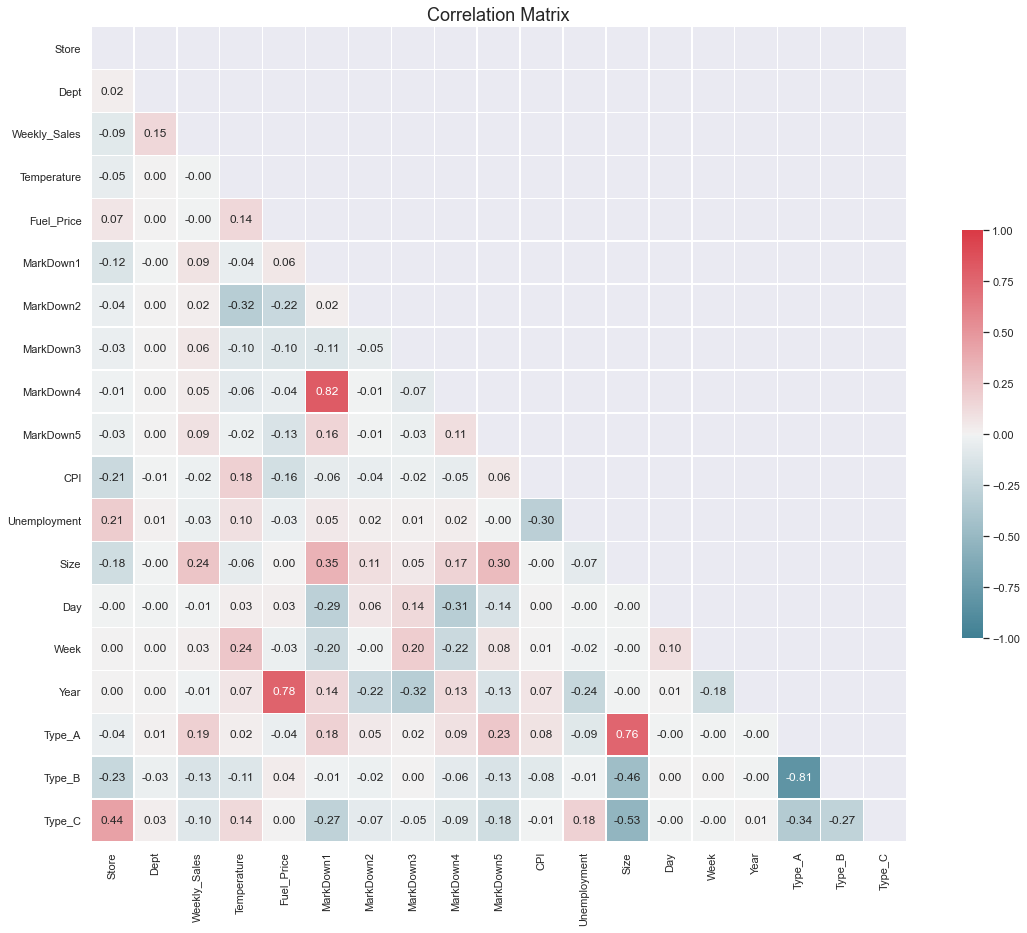

In [ ]:
sns.set(style="darkgrid")

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

plt.show()

So, here I have drop those columns which are not closely corelated and can be removed and is not useful for prediction.

In [ ]:
df.drop(['CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
df_answer.drop(['CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

# Step 4: Model Building. here, I am going to use Random Regression. But first, I will try to solve the problem of Holiday values.

In [ ]:
def WMAE(dataset, real, predicted):
    ''' Input df, real value , predicted value. Output the error value. lower the value, more accurate our model is '''

    # weight allocation on IsHoliday
    weights = dataset.IsHoliday.apply(lambda x : 5 if x else 1)

    # WMSE formula
    return np.round(np.sum(weights * abs(real - predicted)) / (np.sum(weights)), 2)

In [ ]:
X_train = df.drop(['Weekly_Sales'], axis = 1)
Y_train = df['Weekly_Sales']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=12, min_samples_split=4, min_samples_leaf=1)
RF.fit(X_train, Y_train)

RandomForestRegressor(max_depth=27, max_features=12, min_samples_split=4,
                      n_estimators=58)

# Step 5: Here, I got my prediction as expected and then just stored into sample_submission as per the problem statement.


In [ ]:
X_test = df_answer.drop(['Weekly_Sales'], axis = 1)
predict = RF.predict(X_test)

In [ ]:
sample_submission['Weekly_Sales'] = predict
sample_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,34476.206707
1,1_1_2012-11-09,47804.526405
2,1_1_2012-11-16,9525.801164
3,1_1_2012-11-23,39751.655949
4,1_1_2012-11-30,29818.059974
...,...,...
115059,45_98_2013-06-28,3439.304952
115060,45_98_2013-07-05,4180.832416
115061,45_98_2013-07-12,54302.912154
115062,45_98_2013-07-19,6543.593284
